In [ ]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.patches import Patch
from data import AMLData, cluster_colors

In [37]:

feature_df = pd.read_csv('models/regression_all_models_all_data_combos_cv_5v5_2024-02-14.csv', index_col=0)
feature_df.reset_index(inplace=True)
del feature_df['index']
del feature_df['model']
feature_df['source_data'] = feature_df['data_type']
feature_df['feature_names'] = feature_df['feature_names'].str.split('|')

feature_df['feature_scores'] = feature_df['feature_scores'].str.split('|')
feature_df['feature_scores'] = feature_df.feature_scores.apply(np.array, dtype=int)

In [38]:
feature_df.head()

,auc,feature_names,n_feat,rmse,r2,pearson,spearman,pr,sr,k,drug_name,data_type,source_data
0,NaN,"[AAAS_prot, AAMDC_prot, AAMP_prot, AARS2_prot,...",796,46.381918,0.605144,0.785219,0.710769,2.026301e-06,0.000047,0,Venetoclax,proteomics,proteomics
1,NaN,"[AAMDC_prot, ABCF3_prot, ABHD12_prot, ABL2_pro...",315,52.498904,0.649157,0.817058,0.794188,3.525806e-07,0.000001,1,Venetoclax,proteomics,proteomics
2,NaN,"[ABI1_prot, ACSS2_prot, APAF1_prot, CAB39_prot...",63,59.570547,-0.031050,0.645317,0.562308,4.952442e-04,0.003437,2,Venetoclax,proteomics,proteomics
3,NaN,"[AAMDC_prot, ABL1_prot, ABRACL_prot, ACAD8_pro...",152,67.605120,0.202611,0.483459,0.423846,1.435076e-02,0.034735,3,Venetoclax,proteomics,proteomics
4,NaN,"[AAAS_prot, AAK1_prot, AAMDC_prot, AAR2_prot, ...",590,67.502651,0.307469,0.574863,0.532308,2.648076e-03,0.006160,4,Venetoclax,proteomics,proteomics


In [39]:
drugs_to_focus = [
    'Panobinostat',
    'Gilteritinib',
    'Venetoclax',
    'Sorafenib',
    'Quizartinib (AC220)',
    'Trametinib (GSK1120212)',
]

In [40]:
feature_df.head()

,auc,feature_names,n_feat,rmse,r2,pearson,spearman,pr,sr,k,drug_name,data_type,source_data
0,NaN,"[AAAS_prot, AAMDC_prot, AAMP_prot, AARS2_prot,...",796,46.381918,0.605144,0.785219,0.710769,2.026301e-06,0.000047,0,Venetoclax,proteomics,proteomics
1,NaN,"[AAMDC_prot, ABCF3_prot, ABHD12_prot, ABL2_pro...",315,52.498904,0.649157,0.817058,0.794188,3.525806e-07,0.000001,1,Venetoclax,proteomics,proteomics
2,NaN,"[ABI1_prot, ACSS2_prot, APAF1_prot, CAB39_prot...",63,59.570547,-0.031050,0.645317,0.562308,4.952442e-04,0.003437,2,Venetoclax,proteomics,proteomics
3,NaN,"[AAMDC_prot, ABL1_prot, ABRACL_prot, ACAD8_pro...",152,67.605120,0.202611,0.483459,0.423846,1.435076e-02,0.034735,3,Venetoclax,proteomics,proteomics
4,NaN,"[AAAS_prot, AAK1_prot, AAMDC_prot, AAR2_prot, ...",590,67.502651,0.307469,0.574863,0.532308,2.648076e-03,0.006160,4,Venetoclax,proteomics,proteomics


In [9]:
# point of access for all data
data = AMLData()

significant not in columns.
p_value not in columns.


In [41]:
feature_df.head()

,auc,feature_names,n_feat,rmse,r2,pearson,spearman,pr,sr,k,drug_name,data_type,source_data
0,NaN,"[AAAS_prot, AAMDC_prot, AAMP_prot, AARS2_prot,...",796,46.381918,0.605144,0.785219,0.710769,2.026301e-06,0.000047,0,Venetoclax,proteomics,proteomics
1,NaN,"[AAMDC_prot, ABCF3_prot, ABHD12_prot, ABL2_pro...",315,52.498904,0.649157,0.817058,0.794188,3.525806e-07,0.000001,1,Venetoclax,proteomics,proteomics
2,NaN,"[ABI1_prot, ACSS2_prot, APAF1_prot, CAB39_prot...",63,59.570547,-0.031050,0.645317,0.562308,4.952442e-04,0.003437,2,Venetoclax,proteomics,proteomics
3,NaN,"[AAMDC_prot, ABL1_prot, ABRACL_prot, ACAD8_pro...",152,67.605120,0.202611,0.483459,0.423846,1.435076e-02,0.034735,3,Venetoclax,proteomics,proteomics
4,NaN,"[AAAS_prot, AAK1_prot, AAMDC_prot, AAR2_prot, ...",590,67.502651,0.307469,0.574863,0.532308,2.648076e-03,0.006160,4,Venetoclax,proteomics,proteomics


In [ ]:
from collections import Counter


def get_feature_counts(features):
    c = Counter()
    for k in features:
        current_features = Counter(k)
        c += current_features
    return c

def get_feature_matrix(df):
    c=0
    all_counts = []
    for i, d in df.groupby(['data_type', 'drug_name']):
        counts = pd.Series(get_feature_counts(d.feature_names))
        counts = counts.to_frame(name='_'.join(i))
        all_counts.append(counts)
    all_counts = pd.concat(all_counts, axis=1)
    all_counts.fillna(0, inplace=True)
    all_counts.head()
    return all_counts

In [84]:
class DrugFeatures(object):
    def __init__(self, drug_name):
        self.drug_name = drug_name
        self.data = feature_df.loc[feature_df.drug_name.isin([self.drug_name])].copy()
        self.wes = self.ret('wes')
        self.prot = self.ret('proteomics')
        self.rna_seq = self.ret('rna_seq')
        self.phospho = self.ret('phospho')
        self.proteome = self.ret('phospho_proteomics')
        self.combo = self.ret('phospho_proteomics_rna_seq')
    def ret(self, name):
        _df = self.data.loc[self.data.source_data==name]
        return pd.Series(get_feature_counts(_df.feature_names)).sort_values(ascending=False)

In [ ]:
vent = DrugFeatures('Venetoclax')
pano = DrugFeatures('Panobinostat')
sora = DrugFeatures('Sorafenib')
gilt = DrugFeatures('Gilteritinib')

In [295]:
gilt.wes.head(20)

TET2_mut      25
NRAS_mut      24
DNMT3A_mut    24
PDS5B_mut     23
FLT3_mut      23
U2AF1_mut     23
IDH1_mut      23
KIT_mut       23
RUNX1_mut     23
NPM1_mut      22
JAK2_mut      22
CBL_mut       22
SRSF2_mut     22
WT1_mut       22
KRAS_mut      21
HSPA4_mut     21
ASXL1_mut     21
NF1_mut       20
TP53_mut      20
TPTE2_mut     20
dtype: int64

In [296]:
gilt.combo.head(20)

PNP_rna              22
LOC124685_rna        22
RP11-114H24.2_rna    20
ADAM17_prot          20
CTA-29F11.1_rna      20
RP11-564D11.3_rna    19
SNRNP27_prot         19
CYP51A1P2_rna        19
EMSY-S1136s          19
RP4-798A10.7_rna     18
HIST1H4J_rna         18
JUND_prot            18
WARS2_rna            17
RP1-161N10.1_rna     16
NUCB1-AS1_rna        16
LIN9_prot            15
RPS6KA4_prot         15
AL356585.2_rna       15
TRAV36DV7_rna        15
ZNF502_rna           14
dtype: int64

In [ ]:
pano.proteome

In [284]:
def plot_all_features(features, yticklabels=False ):
    
    node_labels = data.meta['Cluster']
    node_labels.dropna(inplace=True)

    node_lut = dict(zip(sorted(node_labels.unique()), cluster_colors))

    node_colors = pd.Series(node_labels, index=data.meta.index.values, name='Cluster').map(node_lut)
    handles = [Patch(facecolor=node_lut[name]) for name in node_lut]
    
    test = data.exp_data.species.subset(
        features,
        index='label'
    )
    prot = test.pivoter(
        index='label', 
        values='exp_value',
        columns='sample_id'
    )

#     return prot
    vmax = max(
        abs(prot.quantile(0.2).min()), 
        prot.quantile(0.8).max()
    )
    vmax=2

    sns.clustermap(
        prot.fillna(0),
        mask=prot.isnull(),
        figsize=(12, 12),
        z_score=0,
        row_cluster=True,
        col_cluster=True,
        method='ward',
        metric='correlation',
        col_colors= node_colors,
        vmax=vmax, 
        vmin=-1*vmax,
        yticklabels=yticklabels,
        xticklabels=False,
        cmap=sns.color_palette("RdBu_r", 11)
    #     linewidths=0.001

    )

    plt.legend(
        handles, node_lut, title='Cluster',
        bbox_to_anchor=(1.1, .8),
        bbox_transform=plt.gcf().transFigure,
        loc='upper right'
    )
    return prot

In [119]:
def features_to_enrichr_list(features):
    cleaned_list = []
    for i in features:
        if '_prot' in i:
            i = i.split('_prot')[0]
        elif '_rna' in i:
            i = i.split('_rna')[0]
        elif '-' in i:
            i = i.split('-')[0]
        elif '_mut' in i:
            i = i.split('_mut')[0]
        cleaned_list.append(i)
    return set(cleaned_list)

In [ ]:
vent.proteome.head(20)

In [212]:
v = set(vent.proteome.head(10).index.values)

vent.proteome.head(10)

KCTD12_prot      24
TBC1D20_prot     22
MRPL33_prot      21
TCF3-S408s       20
EMSY-S1136s      20
LILRB1_prot      20
PRKRA-S18s       19
RNASEH2B_prot    18
RICTOR_prot      18
LIN9_prot        18
dtype: int64

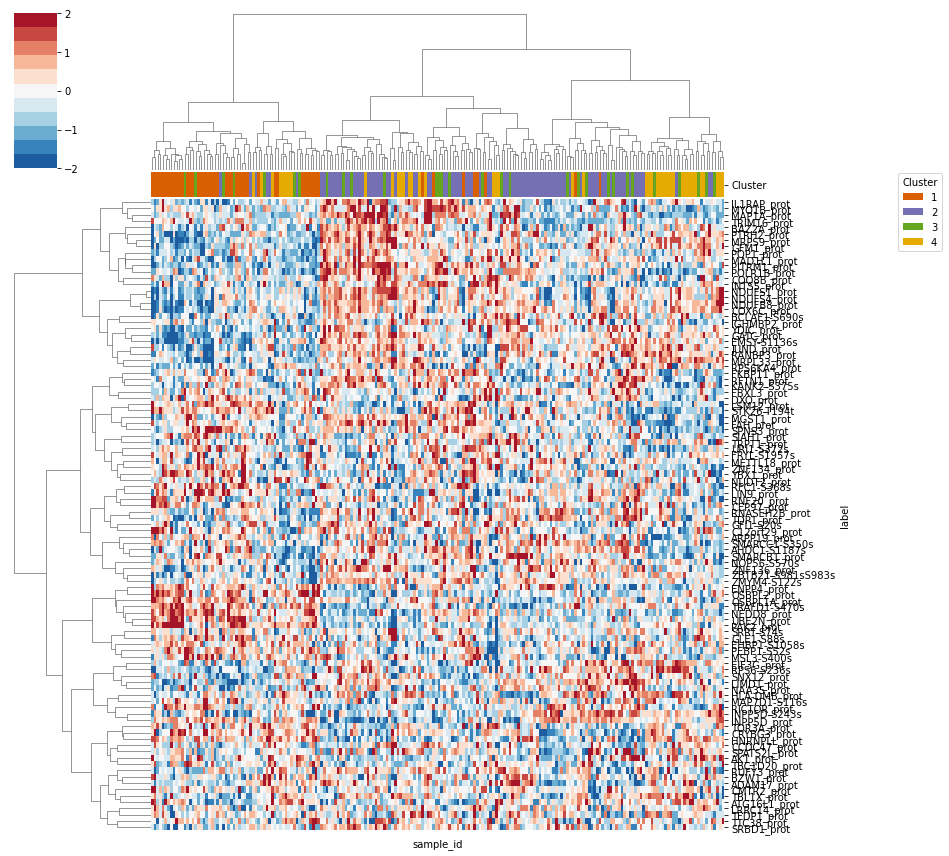

In [285]:
s = set(sora.proteome.head(100).index.values)
test = plot_all_features(s, True)

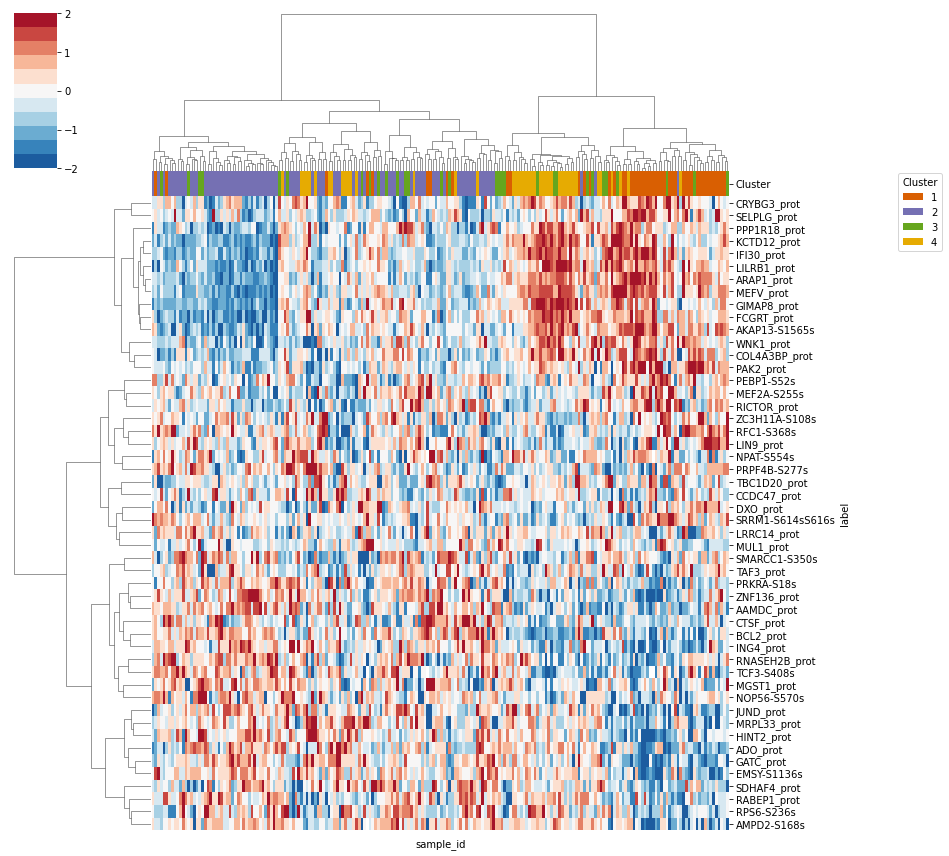

In [287]:
p = set(vent.proteome.head(50).index.values)
test = plot_all_features(p, True)

False
True
False


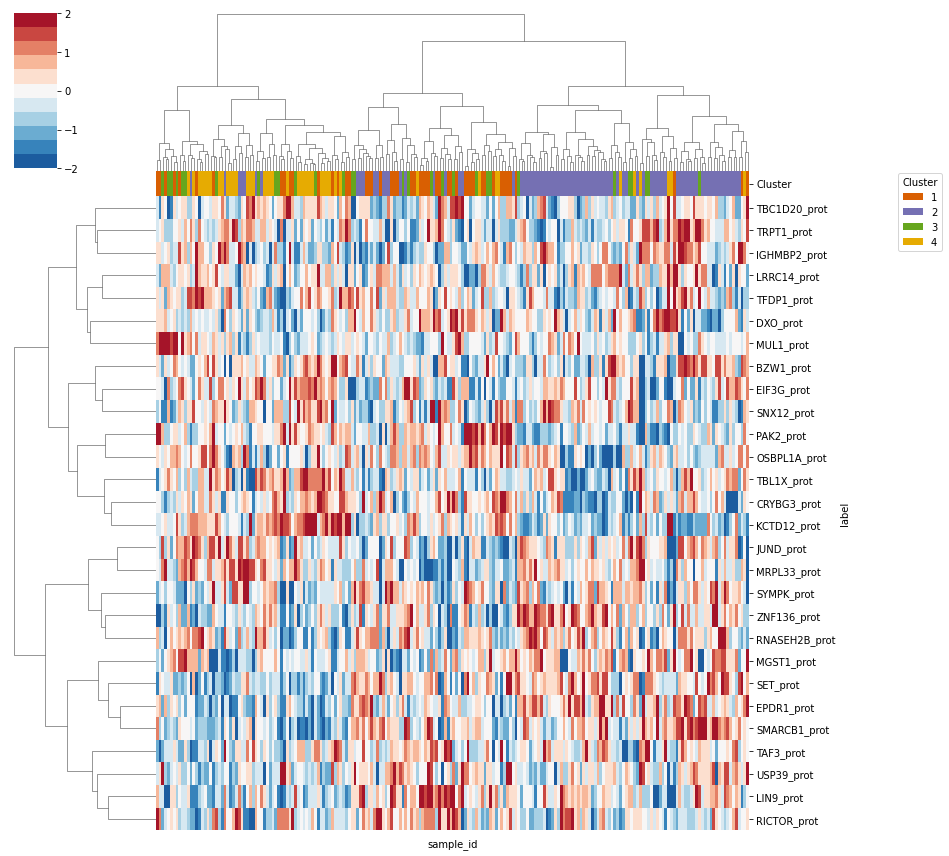

In [290]:
v = set(vent.prot[vent.prot>9].index.values)
p = set(pano.prot[pano.prot>9].index.values)

# v = set(vent.proteome.head(10).index.values)
# p = set(pano.proteome.head(10).index.values)

print('BCL2_prot' in p)
print('BCL2_prot' in v)
both = p.intersection(v)
# both
# both = p.union(v)
print('BCL2_prot' in both)
test = plot_all_features(both, yticklabels=True)

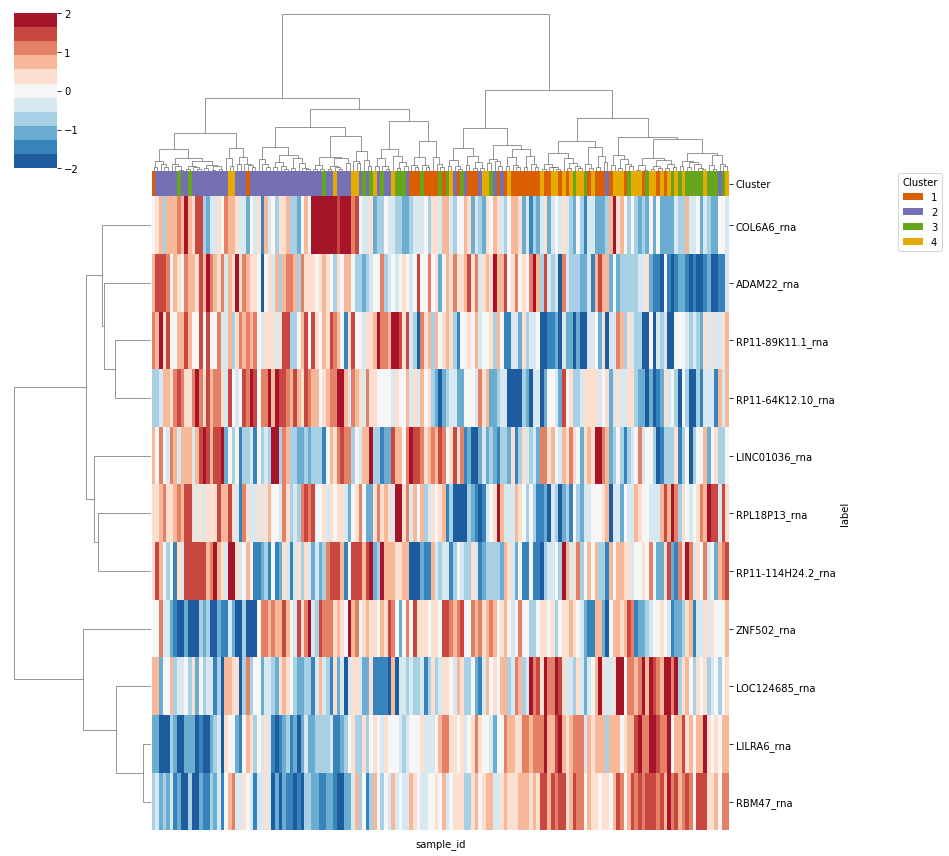

In [297]:
p = set(vent.rna_seq[vent.rna_seq>15].index.values)
test = plot_all_features(p, True)

In [226]:
selected_drugs = data.auc_table[drugs_to_focus].copy()
# selected_drugs.dropna(subset=['Venetoclax', 'Panobinostat'],  inplace=True)
selected_drugs.head()

,Panobinostat,Gilteritinib,Venetoclax,Sorafenib,Quizartinib (AC220),Trametinib (GSK1120212)
sample_id,,,,,,
11-00261,NaN,NaN,NaN,227.353785,119.639393,NaN
11-00376,NaN,NaN,NaN,140.517981,142.364729,NaN
11-00378,NaN,NaN,NaN,219.576749,NaN,NaN
11-00382,NaN,NaN,NaN,211.209502,243.542792,NaN
11-00388,NaN,NaN,NaN,115.214004,77.178534,NaN


In [227]:
test = test[set(test.columns.values).intersection(selected_drugs.index.values)]
test.shape

(68, 159)

In [ ]:
from magine.enrichment.enrichr import Enrichr
e = Enrichr()

In [197]:
pano_list = features_to_enrichr_list(pano.prot[pano.prot>2].index.values)
len(pano_list)

In [199]:
pano_enr = e.run(pano_list, 'Reactome_2016')
pano_enr['sample_id'] = 'combo'
pano_enr.head()

51879005


In [201]:
pano_enr.remove_redundant().loc[pano_enr.p_value<0.01].heatmap(
    linewidths=0.01
);

Number of rows went from 51 to 17


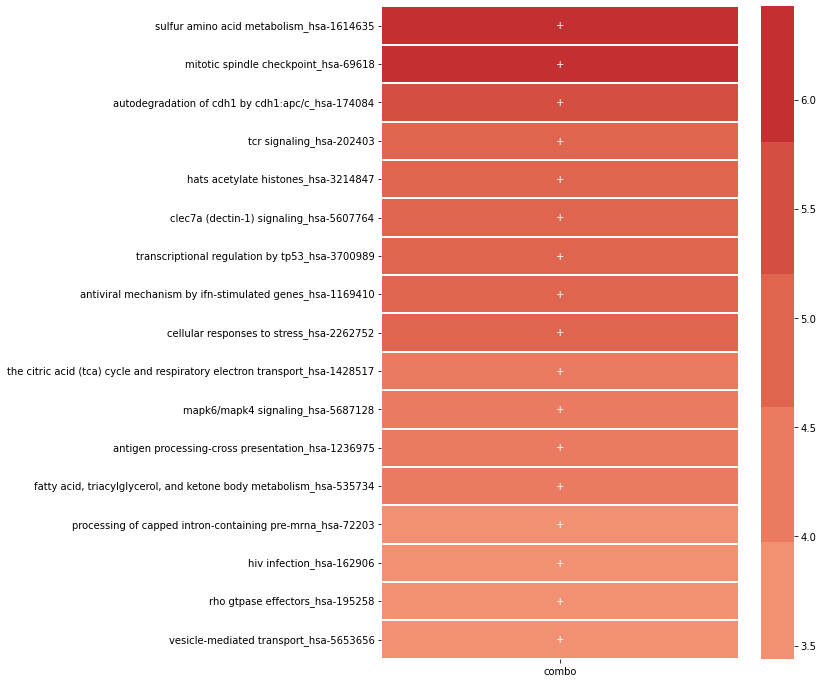

In [206]:
pano_enr.sig.remove_redundant().heatmap(
    min_sig=1,
    linewidths=0.01
);

In [ ]:
pano_list = features_to_enrichr_list(vent.prot[vent.prot>3].index.values)
print(len(pano_list))
pano_enr = e.run(pano_list, 'Reactome_2016')
pano_enr.head()

In [266]:
pano_enr.head(30)

,term_name,rank,p_value,z_score,combined_score,adj_p_value,genes,n_genes,db,significant,sample_id
0,metabolism_hsa-1430728,1,0.000008,1.599306,18.678870,0.004771,"ACAD8,ACOT8,ACSL4,ACSS1,ADA,ADO,ADSL,AKR1A1,AL...",117,Reactome_2016,True,combo
1,class i mhc mediated antigen processing & pres...,2,0.000011,2.586700,29.558545,0.004771,"ANAPC4,CDC16,CTSS,HECTD1,HERC5,KEAP1,KLHL11,LR...",30,Reactome_2016,True,combo
2,immune system_hsa-168256,3,0.000023,1.624120,17.342589,0.004771,"ABL1,ANAPC4,APBB1IP,BCL2,CAMK2D,CASP1,CASP3,CD...",97,Reactome_2016,True,combo
3,chromatin organization_hsa-4839726,4,0.000023,2.806949,29.923055,0.004771,"BRMS1,DOT1L,ELP5,HAT1,HIST2H2AB,ING4,JADE1,JAD...",24,Reactome_2016,True,combo
4,chromatin modifying enzymes_hsa-3247509,5,0.000023,2.806949,29.923055,0.004771,"BRMS1,DOT1L,ELP5,HAT1,HIST2H2AB,ING4,JADE1,JAD...",24,Reactome_2016,True,combo
5,antigen processing: ubiquitination & proteasom...,6,0.000031,2.627133,27.259617,0.005283,"ANAPC4,CDC16,HECTD1,HERC5,KEAP1,KLHL11,LRSAM1,...",26,Reactome_2016,True,combo
6,adaptive immune system_hsa-1280218,7,0.000084,1.821924,17.089298,0.012264,"ANAPC4,CD300A,CDC16,CTSF,CTSS,DYNLL2,FOXO3,HEC...",54,Reactome_2016,True,combo
7,hats acetylate histones_hsa-3214847,8,0.000131,3.532913,31.581122,0.014799,"ELP5,HAT1,HIST2H2AB,ING4,JADE1,JADE3,KAT2A,MEA...",14,Reactome_2016,True,combo
8,global genome nucleotide excision repair (gg-n...,9,0.000133,4.018160,35.850885,0.014799,"ACTR8,COPS6,INO80,INO80E,NFRKB,POLD1,POLE,RAD2...",12,Reactome_2016,True,combo
9,vesicle-mediated transport_hsa-5653656,10,0.000175,1.985790,17.175045,0.014799,"BICD2,CD163,CHMP2A,CLINT1,COG1,COG3,DNASE2,DYN...",38,Reactome_2016,True,combo


To annotate please add a significant column to data


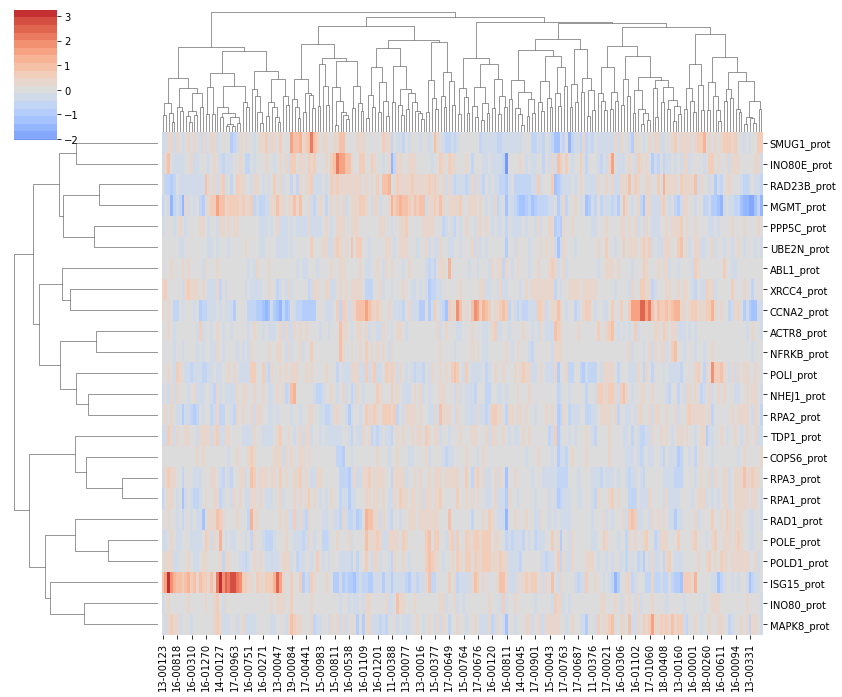

In [267]:
gs = pano_enr.term_to_genes('dna repair_hsa-73894')
data.exp_data.proteomics.heatmap(
    subset=gs, 
    convert_to_log=False,
    subset_index='identifier', 
    index='label',
    linewidths=0.001,
    figsize=(12,10),
    cluster_col=True,
    cluster_row=True,
    y_tick_labels=True,
);

In [242]:
test = plot_all_features(gs, True)

(0, 0)
nan
nan
nan
2


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 864x864 with 0 Axes>

Number of rows went from 104 to 23


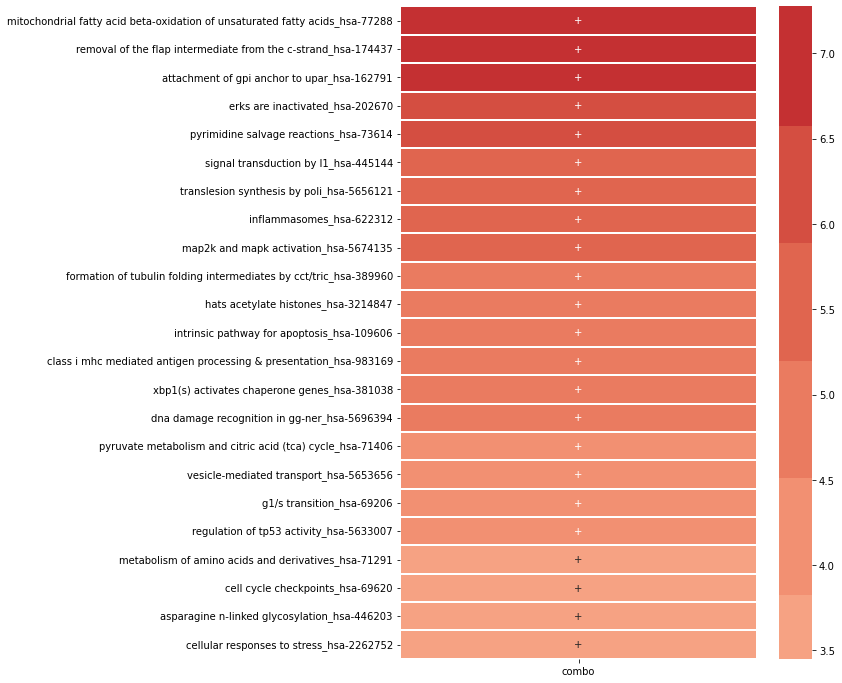

In [235]:
pano_enr['sample_id'] = 'combo'
pano_enr.sig.remove_redundant().heatmap(
    min_sig=1,
    linewidths=0.01
);